决策树的介绍

决策树是一种常见的分类模型，在金融风控、医疗辅助诊断等诸多行业具有较为广泛的应用。决策树的核心思想是基于树结构对数据进行划分，这种思想是人类处理问题时的本能方法。例如在婚恋市场中，女方通常会先询问男方是否有房产，如果有房产再了解是否有车产，如果有车产再看是否有稳定工作……最后得出是否要深入了解的判断。

决策树的主要优点：
具有很好的解释性，模型可以生成可以理解的规则。
可以发现特征的重要程度。
模型的计算复杂度较低。


决策树的主要缺点：
模型容易过拟合，需要采用减枝技术处理。
不能很好利用连续型特征。
预测能力有限，无法达到其他强监督模型效果。
方差较高，数据分布的轻微改变很容易造成树结构完全不同。

Step1: 库函数导入

In [1]:
##  基础函数库
import numpy as np 

## 导入画图库
import matplotlib.pyplot as plt
import seaborn as sns

## 导入决策树模型函数
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Step2: 训练模型

In [2]:
##Demo演示LogisticRegression分类

## 构造数据集
x_fearures = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 1, 0, 1, 0, 1])

## 调用决策树回归模型
tree_clf = DecisionTreeClassifier()

## 调用决策树模型拟合构造的数据集
tree_clf = tree_clf.fit(x_fearures, y_label)

Step3: 数据和模型可视化（需要用到graphviz可视化库）

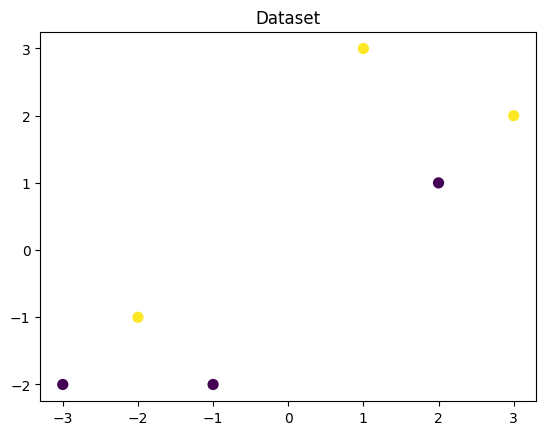

In [3]:
## 可视化构造的数据样本点
plt.figure()
plt.scatter(x_fearures[:,0],x_fearures[:,1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')
plt.show()

In [4]:
## 可视化决策树
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("pengunis")

'pengunis.pdf'

Step4:模型预测

In [5]:
## 创建新样本
x_fearures_new1 = np.array([[0, -1]])
x_fearures_new2 = np.array([[2, 1]])

## 在训练集和测试集上分布利用训练好的模型进行预测
y_label_new1_predict = tree_clf.predict(x_fearures_new1)
y_label_new2_predict = tree_clf.predict(x_fearures_new2)

print('The New point 1 predict class:\n',y_label_new1_predict)
print('The New point 2 predict class:\n',y_label_new2_predict)

The New point 1 predict class:
 [1]
The New point 2 predict class:
 [0]


In [ ]:
#下载需要用到的数据集
!wget https://tianchi-media.oss-cn-beijing.aliyuncs.com/DSW/6tree/penguins_raw.csv

'wget' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


本次我们选择企鹅数据（palmerpenguins）进行方法的尝试训练，该数据集一共包含8个变量，其中7个特征变量，1个目标分类变量。共有150个样本，目标变量为 企鹅的类别 其都属于企鹅类的三个亚属，分别是(Adélie, Chinstrap and Gentoo)。包含的三种种企鹅的七个特征，分别是所在岛屿，嘴巴长度，嘴巴深度，脚蹼长度，身体体积，性别以及年龄。

In [7]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

Step2：数据读取/载入

In [8]:
## 我们利用Pandas自带的read_csv函数读取并转化为DataFrame格式

data = pd.read_csv('./penguins_raw.csv')

In [9]:
## 为了方便我们仅选取四个简单的特征，有兴趣的同学可以研究下其他特征的含义以及使用方法
data = data[['Species','Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']]

Step3：数据信息简单查看

In [10]:
## 利用.info()查看数据的整体信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Culmen Length (mm)   342 non-null    float64
 2   Culmen Depth (mm)    342 non-null    float64
 3   Flipper Length (mm)  342 non-null    float64
 4   Body Mass (g)        342 non-null    float64
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [11]:
## 进行简单的数据查看，我们可以利用 .head() 头部.tail()尾部
data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0


这里我们发现数据集中存在NaN，一般的我们认为NaN在数据集中代表了缺失值，可能是数据采集或处理时产生的一种错误。这里我们采用-1将缺失值进行填补，还有其他例如“中位数填补、平均数填补”的缺失值处理方法有兴趣的同学也可以尝试。

In [12]:
data = data.fillna(-1)

In [13]:
data.tail()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
339,Chinstrap penguin (Pygoscelis antarctica),55.8,19.8,207.0,4000.0
340,Chinstrap penguin (Pygoscelis antarctica),43.5,18.1,202.0,3400.0
341,Chinstrap penguin (Pygoscelis antarctica),49.6,18.2,193.0,3775.0
342,Chinstrap penguin (Pygoscelis antarctica),50.8,19.0,210.0,4100.0
343,Chinstrap penguin (Pygoscelis antarctica),50.2,18.7,198.0,3775.0


In [14]:
## 其对应的类别标签为'Adelie Penguin', 'Gentoo penguin', 'Chinstrap penguin'三种不同企鹅的类别。
data['Species'].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Gentoo penguin (Pygoscelis papua)',
       'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object)

In [15]:
## 利用value_counts函数查看每个类别数量
pd.Series(data['Species']).value_counts()

Species
Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: count, dtype: int64

In [16]:
## 对于特征进行一些统计描述
data.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,344.000000,344.000000,344.000000,344.000000
mean,43.660756,17.045640,199.741279,4177.319767
std,6.428957,2.405614,20.806759,861.263227
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,39.200000,15.500000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4025.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Step4:可视化描述

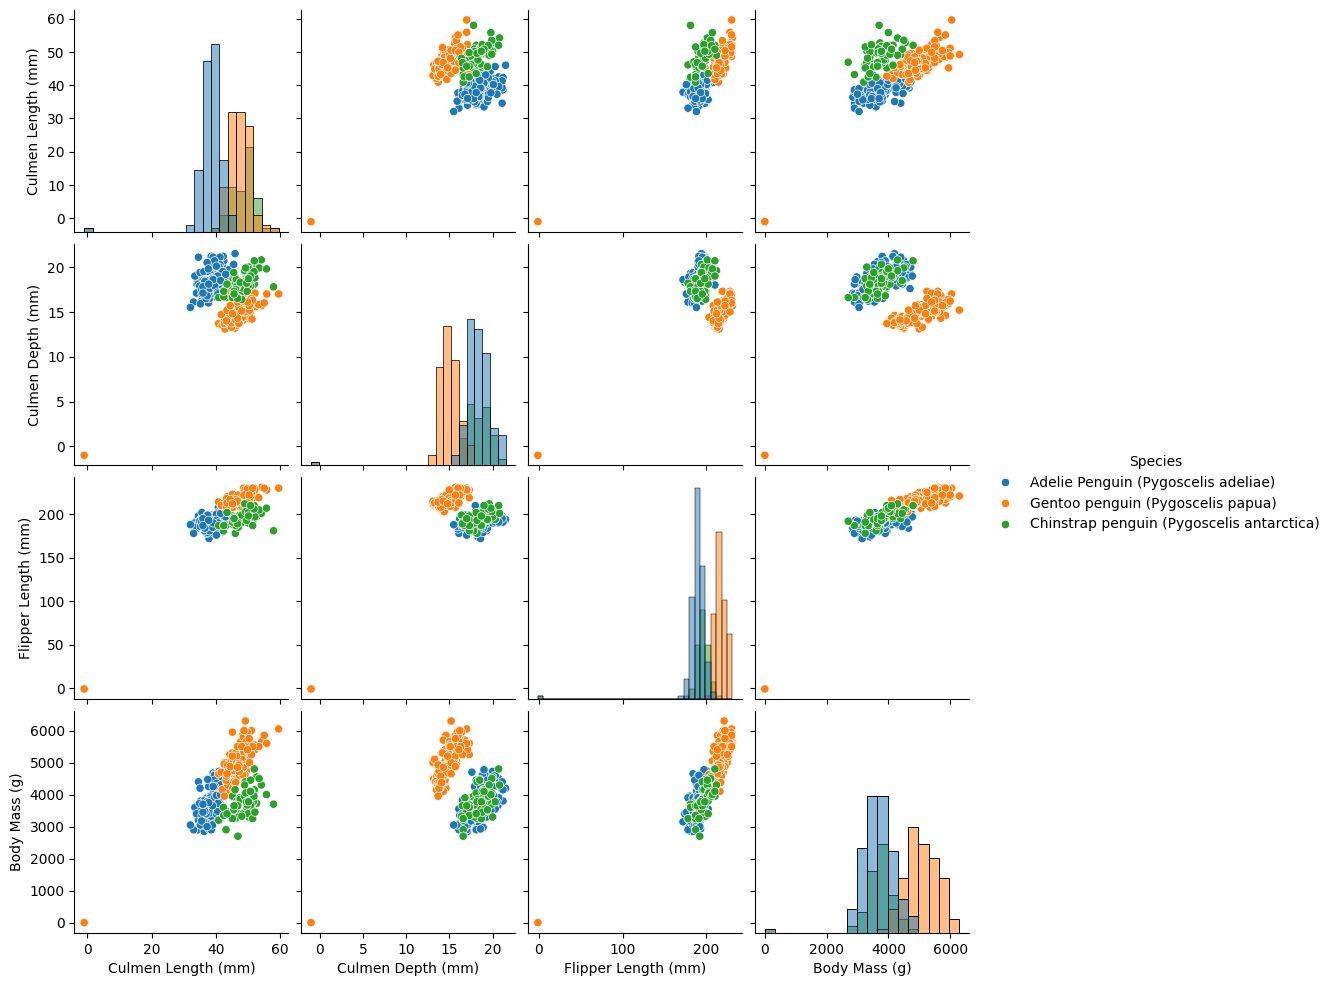

In [17]:
## 特征与标签组合的散点可视化
sns.pairplot(data=data, diag_kind='hist', hue= 'Species')
plt.show()

从上图可以发现，在2D情况下不同的特征组合对于不同类别的企鹅的散点分布，以及大概的区分能力。Culmen Lenth与其他特征的组合散点的重合较少，所以对于数据集的划分能力最好。

In [18]:
'''为了方便我们将标签转化为数字
       'Adelie Penguin (Pygoscelis adeliae)'        ------0
       'Gentoo penguin (Pygoscelis papua)'          ------1
       'Chinstrap penguin (Pygoscelis antarctica)   ------2 '''

def trans(x):
    if x == data['Species'].unique()[0]:
        return 0
    if x == data['Species'].unique()[1]:
        return 1
    if x == data['Species'].unique()[2]:
        return 2

data['Species'] = data['Species'].apply(trans)

利用箱型图我们也可以得到不同类别在不同特征上的分布差异情况。

C:\Users\wang\AppData\Local\Temp\ipykernel_18516\1805832496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, saturation=0.5, palette='pastel', data=data)


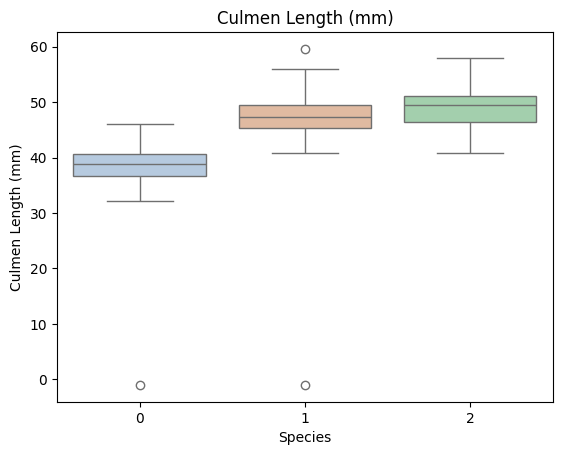

C:\Users\wang\AppData\Local\Temp\ipykernel_18516\1805832496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, saturation=0.5, palette='pastel', data=data)


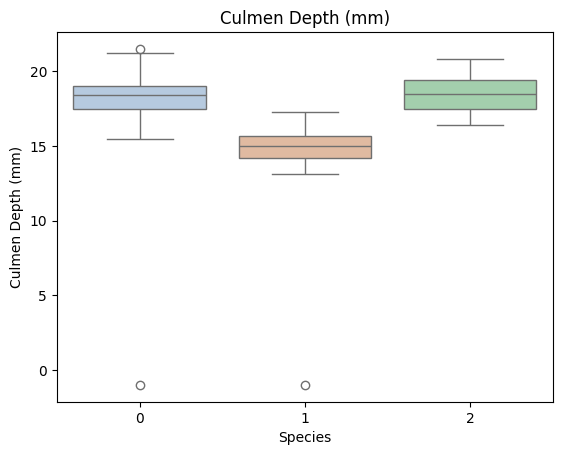

C:\Users\wang\AppData\Local\Temp\ipykernel_18516\1805832496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, saturation=0.5, palette='pastel', data=data)


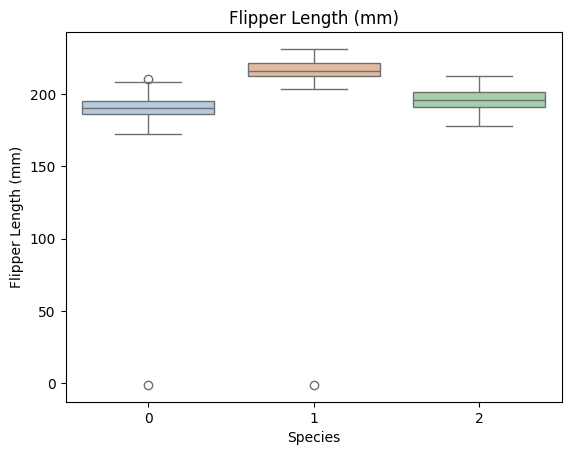

C:\Users\wang\AppData\Local\Temp\ipykernel_18516\1805832496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=col, saturation=0.5, palette='pastel', data=data)


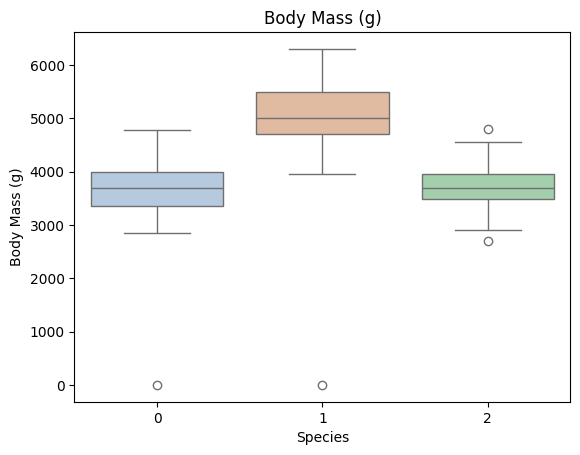

In [19]:
for col in data.columns:
    if col != 'Species':
        sns.boxplot(x='Species', y=col, saturation=0.5, palette='pastel', data=data)
        plt.title(col)
        plt.show()

Step5:利用 决策树模型 在二分类上 进行训练和预测

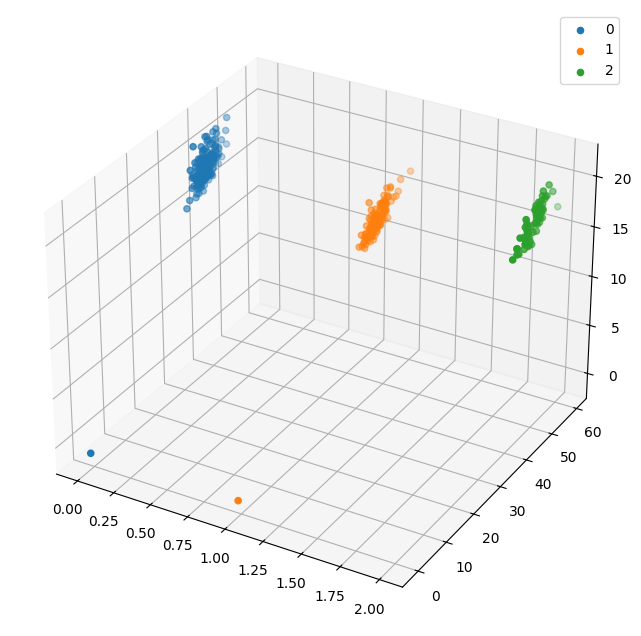

In [20]:
# 选取其前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

data_class0 = data[data['Species']==0].values
data_class1 = data[data['Species']==1].values
data_class2 = data[data['Species']==2].values
# 'setosa'(0), 'versicolor'(1), 'virginica'(2)
ax.scatter(data_class0[:,0], data_class0[:,1], data_class0[:,2],label=data['Species'].unique()[0])
ax.scatter(data_class1[:,0], data_class1[:,1], data_class1[:,2],label=data['Species'].unique()[1])
ax.scatter(data_class2[:,0], data_class2[:,1], data_class2[:,2],label=data['Species'].unique()[2])
plt.legend()

plt.show()

In [21]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1的样本 （不包括类别为2的样本）
data_target_part = data[data['Species'].isin([0,1])][['Species']]
data_features_part = data[data['Species'].isin([0,1])][['Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']]

## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.2, random_state = 2020)

In [22]:
## 从sklearn中导入决策树模型
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
## 定义 决策树模型 
clf = DecisionTreeClassifier(criterion='entropy')
# 在训练集上训练决策树模型
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
## 可视化
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("penguins")

'penguins.pdf'

The accuracy of the Logistic Regression is: 0.9954545454545455
The accuracy of the Logistic Regression is: 1.0
The confusion matrix result:
 [[31  0]
 [ 0 25]]


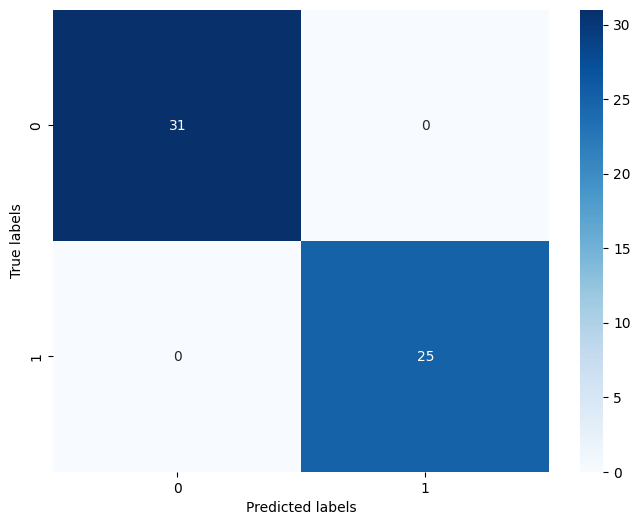

In [24]:

## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)
from sklearn import metrics

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

## 查看混淆矩阵 (预测值和真实值的各类情况统计矩阵)
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

我们可以发现其准确度为1，代表所有的样本都预测正确了。

Step6:利用 决策树模型 在三分类(多分类)上 进行训练和预测

In [25]:
## 测试集大小为20%， 80%/20%分
x_train, x_test, y_train, y_test = train_test_split(data[['Culmen Length (mm)','Culmen Depth (mm)',
            'Flipper Length (mm)','Body Mass (g)']], data[['Species']], test_size = 0.2, random_state = 2020)
## 定义 决策树模型 
clf = DecisionTreeClassifier()
# 在训练集上训练决策树模型
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [26]:
## 在训练集和测试集上分布利用训练好的模型进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 由于决策树模型是概率预测模型（前文介绍的 p = p(y=1|x,\theta)）,所有我们可以利用 predict_proba 函数预测其概率
train_predict_proba = clf.predict_proba(x_train)
test_predict_proba = clf.predict_proba(x_test)

print('The test predict Probability of each class:\n',test_predict_proba)
## 其中第一列代表预测为0类的概率，第二列代表预测为1类的概率，第三列代表预测为2类的概率。

## 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_train,train_predict))
print('The accuracy of the Logistic Regression is:',metrics.accuracy_score(y_test,test_predict))

The test predict Probability of each class:
 [[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
The accuracy of the Logistic Regression is: 0.9963636363636363
The accuracy of the Logistic Regression is: 0.9710144927536232


The confusion matrix result:
 [[31  1  0]
 [ 0 23  0]
 [ 1  0 13]]


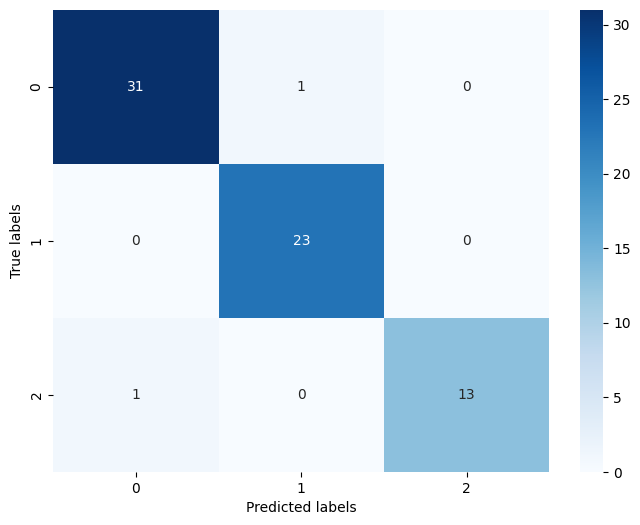

In [27]:
## 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()